In [1]:
import numpy as np
import pandas as pd
from utils.ticker_data import get_stock_data
from datetime import datetime, timedelta
import time
import os

In [ ]:
def download_bulk(ticker, start_date):
    os.makedirs("data", exist_ok=True)
    path = os.path.join("data", f"{ticker}.csv")

    end_date = datetime.today()
    start_date = datetime(*[int(i) for i in start_date.split('-')])

    full_df = pd.DataFrame()
    current_date = start_date
    chunk_size = timedelta(days=365)
    while current_date < end_date:
        chunk_end = min(current_date + chunk_size, end_date)
        print(f"fetching {current_date.strftime('%Y-%m-%d')} {chunk_end.strftime('%Y-%m-%d')}")
        
        df_chunk = get_stock_data(ticker, start=current_date.strftime('%Y-%m-%d'), end = chunk_end.strftime('%Y-%m-%d'), hourly=True)
        full_df = pd.concat([full_df, df_chunk], ignore_index=True)
        
        current_date = chunk_end + timedelta(days=1)
        time.sleep(1)
    print(f"shape : {full_df.shape}")
    full_df.to_csv(path, index=False)

In [112]:
download_bulk("GC=F", "2023-07-13")

c:\Users\borishan\Desktop\ml\code\ml_vs_baseline_reits\utils\ticker_data.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  1 of 1 completed

fetching 2023-07-13 2024-07-12


fetching 2024-07-13 2025-07-12


c:\Users\borishan\Desktop\ml\code\ml_vs_baseline_reits\utils\ticker_data.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  1 of 1 completed


shape : (11564, 7)


In [2]:
df = pd.read_csv(os.path.join("data", "^GSPC.csv"))
df.head()

,Datetime,Open,High,Low,Close,Volume,logReturns
0,2023-07-13 14:30:00+00:00,4492.939941,4498.669922,4492.790039,4494.520020,271161697,0.000376
1,2023-07-13 15:30:00+00:00,4494.549805,4501.169922,4492.810059,4499.459961,205981786,0.001098
2,2023-07-13 16:30:00+00:00,4499.459961,4502.709961,4495.819824,4500.750000,177702071,0.000287
3,2023-07-13 17:30:00+00:00,4500.720215,4506.310059,4500.270020,4502.729980,186794000,0.000440
4,2023-07-13 18:30:00+00:00,4502.689941,4512.520020,4501.640137,4511.720215,239265000,0.001995


In [5]:
from utils.preprocess import prepare_data
import matplotlib.pyplot as plt
X, y = prepare_data(df)
X.head()

,Open,High,Low,Close,Volume,logReturns,Return,Volatility_24h,RSI_14,MACD,...,Return_lag_1,Volume_lag_1,Return_lag_4,Volume_lag_4,Return_lag_12,Volume_lag_12,Return_lag_24,Volume_lag_24,Return_lag_48,Volume_lag_48
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-07-20 18:30:00+00:00,4534.259766,4540.529785,4527.560059,4528.310059,294191000,-0.001317,-0.001317,0.001734,36.750599,-5.545376,...,-0.003477,212082000.0,0.000649,341967946.0,-0.000807,295389001.0,0.000000,15726000.0,0.001099,205981786.0
2023-07-20 19:30:00+00:00,4528.279785,4537.020020,4528.279785,4535.279785,394881000,0.001538,0.001539,0.001732,42.595048,-5.436471,...,-0.001317,294191000.0,0.000246,257735410.0,-0.000567,230387000.0,0.001596,0.0,0.000287,177702071.0
2023-07-20 20:00:00+00:00,4534.790000,4534.870000,4534.770000,4534.870000,321013000,-0.000090,-0.000090,0.001702,42.347285,-5.166774,...,0.001539,394881000.0,-0.000340,219546000.0,-0.001014,216750000.0,0.001567,288178481.0,0.000440,186794000.0
2023-07-20 21:00:00+00:00,4534.870000,4534.870000,4534.870000,4534.870000,16078000,0.000000,0.000000,0.001672,42.347285,-4.772506,...,-0.000090,321013000.0,-0.003477,212082000.0,0.002513,254411000.0,0.001470,290633713.0,0.001997,239265000.0
2023-07-21 13:30:00+00:00,4550.160156,4554.169922,4536.009766,4537.009766,0,0.000472,0.000472,0.001672,44.309031,-4.173396,...,0.000000,16078000.0,-0.001317,294191000.0,-0.001409,368338000.0,0.000471,218048000.0,-0.000406,350549000.0


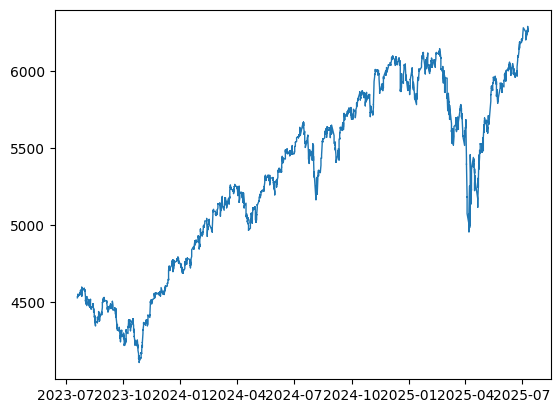

In [19]:
plt.plot(pd.to_datetime(X.index).date, X.Close, lw = 1)